#### CACHE SETUP

In [1]:
# Setting up the cache
import os
caches_dir = ["D:\SignLanguage\.cache"]

# Will set the cache in the first caches dir found in the storage
for cache in caches_dir:
    if os.path.exists(cache):
        os.environ['HF_HOME'] = cache
        print(f"Cache path set on {cache}")
        break
    else:
        print(f"Path does not  exist {cache}")  

Cache path set on D:\SignLanguage\.cache


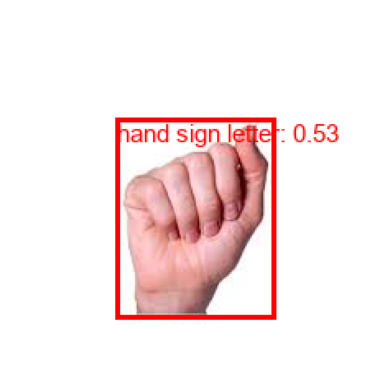

In [16]:
import requests
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection 

# Load model and processor
model_id = "model_files/"
device = "cuda" if torch.cuda.is_available() else "cpu"

processor = AutoProcessor.from_pretrained(model_id)
model = AutoModelForZeroShotObjectDetection.from_pretrained(model_id).to(device)

# Load image
image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTBBy8UtRfRb-u84guqq-seMRg5CW-3qSeOyw&s"
image = Image.open(requests.get(image_url, stream=True).raw)

# Define text queries
text = "hand sign letter A. hand sign letter B."

# Prepare inputs
inputs = processor(images=image, text=text, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)

# Post-process outputs
results = processor.post_process_grounded_object_detection(
    outputs,
    inputs.input_ids,
    box_threshold=0.4,
    text_threshold=0.3,
    target_sizes=[image.size[::-1]]
)

font = ImageFont.truetype("arial.ttf", 15)  # Make sure the font file is available or use a default font

# Draw bounding boxes on the image
draw = ImageDraw.Draw(image)
for result in results:
    for score, label, box in zip(result["scores"], result["labels"], result["boxes"]):
        draw.rectangle(box.tolist(), outline="red", width=3)
        draw.text((box[0], box[1]), f"{label}: {score:.2f}", fill="red", font=font)

# Show the image
plt.imshow(image)
plt.axis('off')
plt.show()